In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Admission_Predict.csv')

In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df1 = df.rename(columns={'Chance of Admit ': 'Chance of Admit'})
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [10]:
df1['Chance of Admit'].value_counts()

0.64    17
0.71    16
0.72    15
0.73    13
0.94    12
0.79    12
0.76    12
0.70    12
0.78    12
0.74    11
0.80    11
0.68    10
0.93     9
0.84     9
0.89     9
0.65     9
0.62     9
0.82     8
0.86     8
0.75     8
0.90     8
0.57     8
0.81     8
0.77     8
0.91     7
0.69     7
0.96     7
0.66     7
0.61     7
0.67     7
0.85     6
0.63     6
0.56     6
0.92     6
0.58     5
0.46     5
0.87     5
0.54     5
0.52     5
0.47     5
0.59     4
0.49     4
0.97     4
0.88     4
0.95     4
0.53     3
0.48     3
0.44     3
0.42     3
0.83     3
0.38     2
0.34     2
0.36     2
0.45     2
0.50     2
0.43     1
0.51     1
0.55     1
0.60     1
0.39     1
Name: Chance of Admit, dtype: int64

In [18]:
lower_bound = 0.8
upper_bound = 1

mask = (df1['Chance of Admit'] >= lower_bound) & (df1['Chance of Admit'] <= upper_bound)
subset1 = df1.loc[mask, :]
subset1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
3,4,322,110,3,3.5,2.5,8.67,1,0.80
5,6,330,115,5,4.5,3.0,9.34,1,0.90
11,12,327,111,4,4.0,4.5,9.00,1,0.84
22,23,328,116,5,5.0,5.0,9.50,1,0.94
...,...,...,...,...,...,...,...,...,...
394,395,329,111,4,4.5,4.0,9.23,1,0.89
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91


In [19]:
lower_bound = 0.4
upper_bound = 0.8

mask = (df1['Chance of Admit'] >= lower_bound) & (df1['Chance of Admit'] < upper_bound)
subset2 = df1.loc[mask, :]
subset2

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
4,5,314,103,2,2.0,3.0,8.21,0,0.65
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
...,...,...,...,...,...,...,...,...,...
389,390,320,108,3,3.5,4.0,8.44,1,0.76
390,391,314,102,2,2.0,2.5,8.24,0,0.64
391,392,318,106,3,2.0,3.0,8.65,0,0.71
393,394,317,104,2,3.0,3.0,8.76,0,0.77


In [20]:
# lower_bound = 0.8
upper_bound = 0.4

mask = (df1['Chance of Admit'] <= upper_bound)
subset3 = df1.loc[mask, :]
subset3

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,59,300,99,1,3.0,2.0,6.80,1,0.36
91,92,299,97,3,5.0,3.5,7.66,0,0.38
92,93,298,98,2,4.0,3.0,8.03,0,0.34
94,95,303,99,3,2.0,2.5,7.66,0,0.36
374,375,315,105,2,2.0,2.5,7.65,0,0.39
375,376,304,101,2,2.0,2.5,7.66,0,0.38
376,377,297,96,2,2.5,2.0,7.43,0,0.34


In [23]:
for rows in subset1['Chance of Admit'].values:
    subset1.replace(rows, 'Admitted', inplace =True)
subset1

C:\Users\dell\AppData\Local\Temp\ipykernel_12136\103891413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1.replace(rows, 'Admitted', inplace =True)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,Admitted
3,4,322,110,3,3.5,2.5,8.67,1,Admitted
5,6,330,115,5,4.5,3.0,9.34,1,Admitted
11,12,327,111,4,4.0,4.5,9.00,1,Admitted
22,23,328,116,5,5.0,5.0,9.50,1,Admitted
...,...,...,...,...,...,...,...,...,...
394,395,329,111,4,4.5,4.0,9.23,1,Admitted
395,396,324,110,3,3.5,3.5,9.04,1,Admitted
396,397,325,107,3,3.0,3.5,9.11,1,Admitted
397,398,330,116,4,5.0,4.5,9.45,1,Admitted


In [24]:
for rows in subset2['Chance of Admit'].values:
    subset2.replace(rows, 'Might get Aadmitted', inplace =True)
subset2

C:\Users\dell\AppData\Local\Temp\ipykernel_12136\4249790747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2.replace(rows, 'Might get Aadmitted', inplace =True)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,2,324,107,4,4.0,4.5,8.87,1,Might get Aadmitted
2,3,316,104,3,3.0,3.5,8.00,1,Might get Aadmitted
4,5,314,103,2,2.0,3.0,8.21,0,Might get Aadmitted
6,7,321,109,3,3.0,4.0,8.20,1,Might get Aadmitted
7,8,308,101,2,3.0,4.0,7.90,0,Might get Aadmitted
...,...,...,...,...,...,...,...,...,...
389,390,320,108,3,3.5,4.0,8.44,1,Might get Aadmitted
390,391,314,102,2,2.0,2.5,8.24,0,Might get Aadmitted
391,392,318,106,3,2.0,3.0,8.65,0,Might get Aadmitted
393,394,317,104,2,3.0,3.0,8.76,0,Might get Aadmitted


In [25]:
for rows in subset3['Chance of Admit'].values:
    subset3.replace(rows, 'Not Aadmitted', inplace =True)
subset3

C:\Users\dell\AppData\Local\Temp\ipykernel_12136\2573981093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset3.replace(rows, 'Not Aadmitted', inplace =True)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,59,300,99,1,3.0,2.0,6.80,1,Not Aadmitted
91,92,299,97,3,5.0,3.5,7.66,0,Not Aadmitted
92,93,298,98,2,4.0,3.0,8.03,0,Not Aadmitted
94,95,303,99,3,2.0,2.5,7.66,0,Not Aadmitted
374,375,315,105,2,2.0,2.5,7.65,0,Not Aadmitted
375,376,304,101,2,2.0,2.5,7.66,0,Not Aadmitted
376,377,297,96,2,2.5,2.0,7.43,0,Not Aadmitted


In [15]:
# for columns_name in df1['Chance of Admit'].values:
    
#     if columns_name > 0.80:
#         df1.replace(columns_name, 'Admitted', inplace=True)
#     elif 0.5 <= columns_name <= 0.80:
#         df1.replace(columns_name, 'Might get Admitted', inplace=True)
#     elif columns_name < 0.50:
#         df1.replace(columns_name, 'Not Admitted', inplace=True)


In [26]:
merge = pd.concat([subset1, subset2, subset3], axis=0)
merge

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,Admitted
3,4,322,110,3,3.5,2.5,8.67,1,Admitted
5,6,330,115,5,4.5,3.0,9.34,1,Admitted
11,12,327,111,4,4.0,4.5,9.00,1,Admitted
22,23,328,116,5,5.0,5.0,9.50,1,Admitted
...,...,...,...,...,...,...,...,...,...
92,93,298,98,2,4.0,3.0,8.03,0,Not Aadmitted
94,95,303,99,3,2.0,2.5,7.66,0,Not Aadmitted
374,375,315,105,2,2.0,2.5,7.65,0,Not Aadmitted
375,376,304,101,2,2.0,2.5,7.66,0,Not Aadmitted


In [27]:
merge.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [28]:
sort =  merge.sort_values(by=['GRE Score', 'TOEFL Score', 'University Rating'], ascending=False)
sort

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,26,340,120,5,4.5,4.5,9.60,1,Admitted
202,203,340,120,5,4.5,4.5,9.91,1,Admitted
81,82,340,120,4,5.0,5.0,9.50,1,Admitted
143,144,340,120,4,4.5,4.0,9.92,1,Admitted
84,85,340,115,5,4.5,4.5,9.45,1,Admitted
...,...,...,...,...,...,...,...,...,...
272,273,294,95,1,1.5,1.5,7.64,0,Might get Aadmitted
79,80,294,93,1,1.5,2.0,7.36,0,Might get Aadmitted
168,169,293,97,2,2.0,4.0,7.80,1,Might get Aadmitted
117,118,290,104,4,2.0,2.5,7.46,0,Might get Aadmitted


In [29]:
transpose = sort.transpose()
transpose

,25,202,81,143,84,33,384,284,47,148,...,78,327,205,344,28,272,79,168,117,377
Serial No.,26,203,82,144,85,34,385,285,48,149,...,79,328,206,345,29,273,80,169,118,378
GRE Score,340,340,340,340,340,340,340,340,339,339,...,296,295,295,295,295,294,294,293,290,290
TOEFL Score,120,120,120,120,115,114,113,112,119,116,...,95,101,99,96,93,95,93,97,104,100
University Rating,5,5,4,4,5,5,4,4,5,4,...,2,2,2,2,1,1,1,2,4,1
SOP,4.5,4.5,5.0,4.5,4.5,4.0,5.0,5.0,4.5,4.0,...,3.0,2.5,2.5,1.5,2.0,1.5,1.5,2.0,2.0,1.5
LOR,4.5,4.5,5.0,4.0,4.5,4.0,5.0,4.5,4.0,3.5,...,2.0,2.0,3.0,2.0,2.0,1.5,2.0,4.0,2.5,2.0
CGPA,9.6,9.91,9.5,9.92,9.45,9.6,9.74,9.66,9.7,9.8,...,7.54,7.86,7.65,7.34,7.2,7.64,7.36,7.8,7.46,7.56
Research,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
Chance of Admit,Admitted,Admitted,Admitted,Admitted,Admitted,Admitted,Admitted,Admitted,Admitted,Admitted,...,Might get Aadmitted,Might get Aadmitted,Might get Aadmitted,Might get Aadmitted,Might get Aadmitted,Might get Aadmitted,Might get Aadmitted,Might get Aadmitted,Might get Aadmitted,Might get Aadmitted


In [30]:
sort.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [31]:
sort.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit       object
dtype: object

In [32]:
melt = sort.melt(id_vars=['Serial No.', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit' ], var_name="exams", value_name="score")
melt

,Serial No.,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,exams,score
0,26,5,4.5,4.5,9.60,1,Admitted,GRE Score,340
1,203,5,4.5,4.5,9.91,1,Admitted,GRE Score,340
2,82,4,5.0,5.0,9.50,1,Admitted,GRE Score,340
3,144,4,4.5,4.0,9.92,1,Admitted,GRE Score,340
4,85,5,4.5,4.5,9.45,1,Admitted,GRE Score,340
...,...,...,...,...,...,...,...,...,...
795,273,1,1.5,1.5,7.64,0,Might get Aadmitted,TOEFL Score,95
796,80,1,1.5,2.0,7.36,0,Might get Aadmitted,TOEFL Score,93
797,169,2,2.0,4.0,7.80,1,Might get Aadmitted,TOEFL Score,97
798,118,4,2.0,2.5,7.46,0,Might get Aadmitted,TOEFL Score,104


In [33]:
select = pd.DataFrame(df, columns=['Research', 'Chance of Admit ', 'University Rating', 'SOP'])
select

,Research,Chance of Admit,University Rating,SOP
0,1,0.92,4,4.5
1,1,0.76,4,4.0
2,1,0.72,3,3.0
3,1,0.80,3,3.5
4,0,0.65,2,2.0
...,...,...,...,...
395,1,0.82,3,3.5
396,1,0.84,3,3.0
397,1,0.91,4,5.0
398,0,0.67,3,3.5


In [34]:
cast = pd.pivot_table(select, index=['Research','University Rating', 'SOP'])
cast

Chance of Admit 
Research University Rating SOP                  
0        1                 1.0          0.537500
                           1.5          0.515000
                           2.0          0.530000
                           2.5          0.600000
                           3.0          0.520000
...                                          ...
1        5                 3.0          0.710000
                           3.5          0.810000
                           4.0          0.910000
                           4.5          0.915333
                           5.0          0.919091

[62 rows x 1 columns]

In [35]:
sort.duplicated().sum()

0

In [36]:
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [37]:
df1.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [39]:
select_df = pd.DataFrame(df1, columns = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit'])
select_df

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65
...,...,...,...,...
395,324,110,9.04,0.82
396,325,107,9.11,0.84
397,330,116,9.45,0.91
398,312,103,8.78,0.67


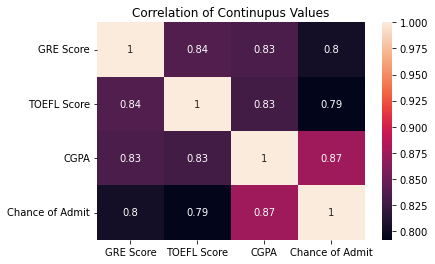

In [41]:
correleation = select_df.corr()
sns.heatmap(correleation, annot=True)
plt.title('Correlation of Continupus Values')
plt.show()

In [45]:
X = df1[['CGPA']].values
y = df1['Chance of Admit']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [48]:
from sklearn import metrics 
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Square Error: ', mse)
print('Rmse: ', rmse)

Mean Square Error:  0.005219443049555053
Rmse:  0.07224571301852487


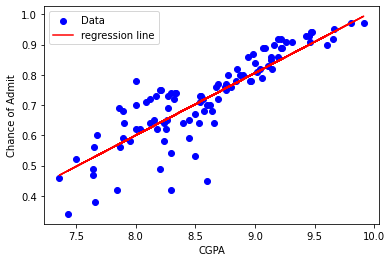

In [49]:
plt.scatter(X_test, y_test, color="blue", label="Data")
plt.plot(X_test, y_pred, color="red", label="regression line")

plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend()

plt.show()

In [50]:
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


(array([ 7., 14., 20., 32., 49., 59., 79., 51., 40., 49.]),
 array([0.34 , 0.403, 0.466, 0.529, 0.592, 0.655, 0.718, 0.781, 0.844,
        0.907, 0.97 ]),
 <BarContainer object of 10 artists>)

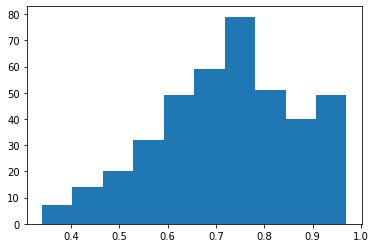

In [51]:
plt.hist(df1['Chance of Admit'])

<Axes: ylabel='GRE Score'>

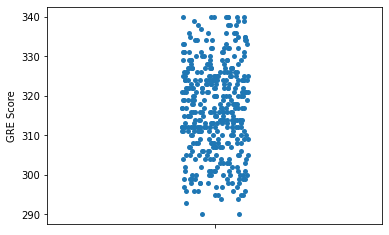

In [52]:
sns.stripplot(df1['GRE Score'])

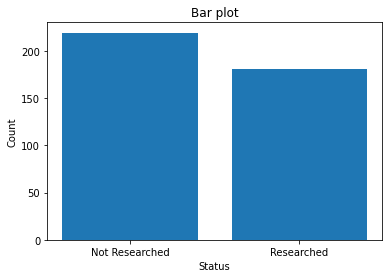

In [58]:
plt.bar(['Not Researched', 'Researched'], df1['Research'].value_counts().values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Bar plot')
plt.show()

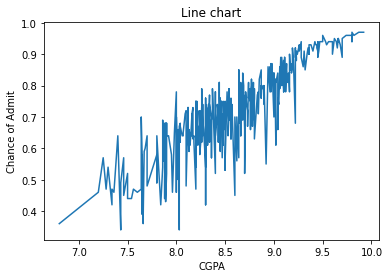

In [66]:
X = 'CGPA'
Y = 'Chance of Admit'
df_sorted = df1.sort_values(X)
# df_sorte = df1.sort_values(Y)
plt.plot(df_sorted[X], df_sorted[Y])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('Line chart')
plt.show()

In [67]:
df1.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

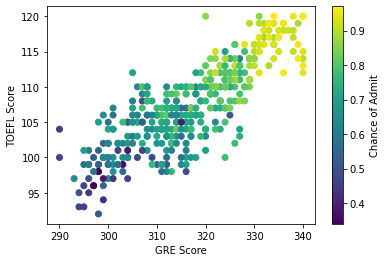

In [72]:
plt.scatter(df1['GRE Score'], df1['TOEFL Score'], c=df1['Chance of Admit'])
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.colorbar(label='Chance of Admit')

plt.show()